In [1]:
import sys
import math
import matplotlib.pyplot as plt

In [4]:
M = 128
print("M", M)

M 128


In [5]:
U0 = []
for j in range(0, M):
    if j <= M / 2:
        U0.append(j * math.pi / M)
    else:
        U0.append(pi - j * math.pi / M)
U0.append(0)

In [6]:
print(U0)

[0.0, 0.02454369260617026, 0.04908738521234052, 0.07363107781851078, 0.09817477042468103, 0.1227184630308513, 0.14726215563702155, 0.1718058482431918, 0.19634954084936207, 0.22089323345553233, 0.2454369260617026, 0.2699806186678728, 0.2945243112740431, 0.3190680038802134, 0.3436116964863836, 0.36815538909255385, 0.39269908169872414, 0.4172427743048944, 0.44178646691106466, 0.4663301595172349, 0.4908738521234052, 0.5154175447295755, 0.5399612373357456, 0.5645049299419159, 0.5890486225480862, 0.6135923151542565, 0.6381360077604268, 0.662679700366597, 0.6872233929727672, 0.7117670855789375, 0.7363107781851077, 0.760854470791278, 0.7853981633974483, 0.8099418560036186, 0.8344855486097889, 0.859029241215959, 0.8835729338221293, 0.9081166264282996, 0.9326603190344698, 0.9572040116406401, 0.9817477042468103, 1.0062913968529805, 1.030835089459151, 1.055378782065321, 1.0799224746714913, 1.1044661672776617, 1.1290098598838318, 1.1535535524900022, 1.1780972450961724, 1.2026409377023426, 1.2271846

In [10]:
# This function updates the temp of the rode given the current temp
def update_temperature(current_temp, alpha):

    new_temp = []
    for j in range(0, M + 1):

        if j == 0 or j == M:
            new_temp_j = 0
        else:
            new_temp_j = current_temp[j] + alpha * (current_temp[j-1] - 2 * current_temp[j] + current_temp[j+1])

        new_temp.append(new_temp_j)

    return new_temp

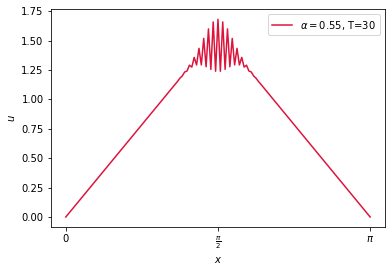

In [16]:
# (a)
T = 30
alpha = 0.55

U_list = [U0]
# plt.plot(range(0, M + 1), U0, color='blue')
for n in range(0, T):
    new_U = update_temperature(U_list[-1], alpha)
    U_list.append(new_U)

plt.plot(range(0, M+1), U_list[T], color='crimson', label=r'$\alpha=$' + str(alpha) + ', T=' + str(T))
plt.xlabel(r'$x$')
plt.ylabel(r'$u$')
plt.xticks([0, int(M/2), M], [r'0', r'$\frac{\pi}{2}$', r'$\pi$'])
plt.legend(fancybox=True)

plt.show()

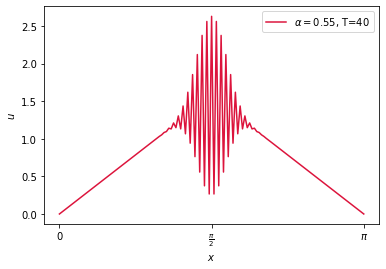

In [17]:
# (b)
T = 40
alpha = 0.55

U_list = [U0]
# plt.plot(range(0, M + 1), U0, color='blue')
for n in range(0, T):
    new_U = update_temperature(U_list[-1], alpha)
    U_list.append(new_U)

plt.plot(range(0, M+1), U_list[T], color='crimson', label=r'$\alpha=$' + str(alpha) + ', T=' + str(T))
plt.xlabel(r'$x$')
plt.ylabel(r'$u$')
plt.xticks([0, int(M/2), M], [r'0', r'$\frac{\pi}{2}$', r'$\pi$'])
plt.legend(fancybox=True)

plt.show()

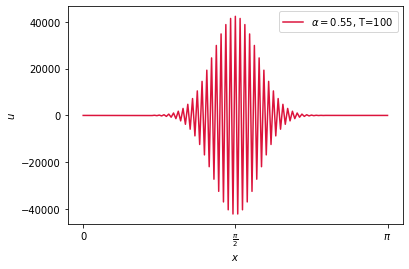

In [18]:
# (c)
T = 100
alpha = 0.55

U_list = [U0]
# plt.plot(range(0, M + 1), U0, color='blue')
for n in range(0, T):
    new_U = update_temperature(U_list[-1], alpha)
    U_list.append(new_U)

plt.plot(range(0, M+1), U_list[T], color='crimson', label=r'$\alpha=$' + str(alpha) + ', T=' + str(T))
plt.xlabel(r'$x$')
plt.ylabel(r'$u$')
plt.xticks([0, int(M/2), M], [r'0', r'$\frac{\pi}{2}$', r'$\pi$'])
plt.legend(fancybox=True)

plt.show()

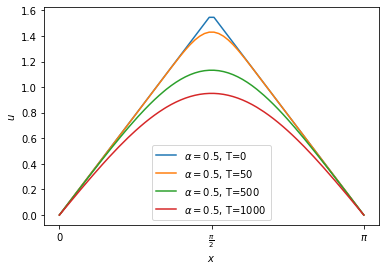

In [22]:
# (d)
T = 5000
alpha = 0.5

U_list = [U0]
# plt.plot(range(0, M + 1), U0, color='blue')
for n in range(0, T):
    new_U = update_temperature(U_list[-1], alpha)
    U_list.append(new_U)

    if n in [0, 50, 500, 1000]:
        plt.plot(range(0, M+1), new_U, label=r'$\alpha=$' + str(alpha) + ', T=' + str(n))

    
plt.xlabel(r'$x$')
plt.ylabel(r'$u$')
plt.xticks([0, int(M/2), M], [r'0', r'$\frac{\pi}{2}$', r'$\pi$'])
plt.legend(fancybox=True)

plt.show()

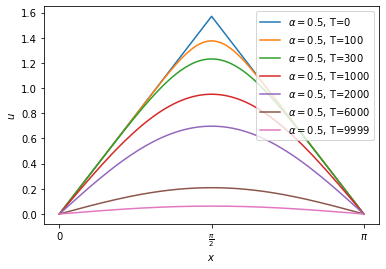

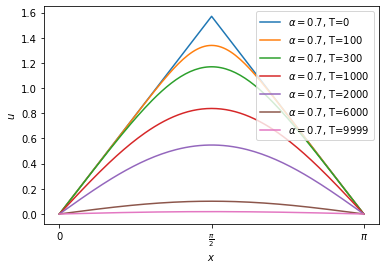

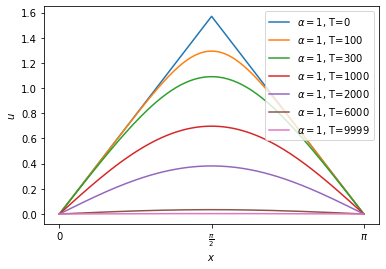

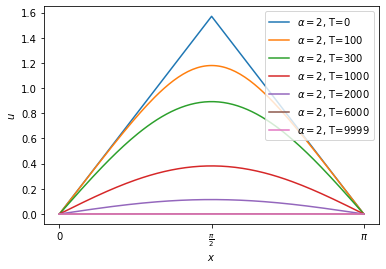

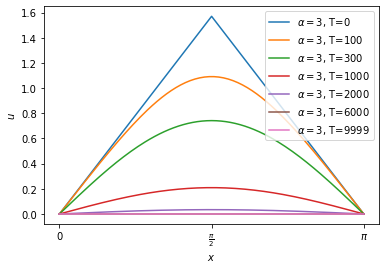

In [3]:
import math
import numpy as np
import matplotlib.pyplot as plt

N = 128
dx = math.pi / N
T = 10000

for alpha in [0.5, 0.7, 1, 2, 3]:

    # initial function
    U0 = []
    for j in range(1, N):
        u = j * dx
        if j >= N / 2:
            u = math.pi - j * dx
        # if j == N:
        #     u = 0

        U0.append(u)

    U0 = np.array(U0)

    # U0: a list showing temprature for N+1 points on the pole.

    # Tridiagonal solver

    a = np.zeros((N - 1, ))
    b = np.zeros((N - 1, ))
    c = np.zeros((N - 1, ))

    for i in range(0, N - 1):
        b[i] = 1 + 2 * alpha
        if i < N - 2:
            c[i] = -alpha

        if i > 0:
            a[i] = -alpha


    def TDMSolver(a, b, c, u):

        N = len(a)

        ac = np.array(a)
        bc = np.array(b)
        cc = np.array(c)
        uc = np.array(u)

        for i in range(1, N):
            w = ac[i] / bc[i - 1]
            bc[i] = bc[i] - w * cc[i - 1]
            uc[i] = uc[i] - w * uc[i - 1]

        x = np.zeros((N, ))
        x[N-1] = uc[N-1] / bc[N-1]

        for i in range(N - 2, -1, -1):
            x[i] = (uc[i] - cc[i] * x[i + 1]) / bc[i]

        return x

    U = U0
    U_checkpoints = [U0]
    for t in range(1, T + 1):
        new_U = TDMSolver(a, b, c, U)
        U_checkpoints.append(new_U)
        U = new_U

    plot_time_steps = [0, 100, 300, 1000, 2000, 6000, T-1]

    for time_step in plot_time_steps:
        U = U_checkpoints[time_step]
        plt.plot(range(0, N + 1), [0] + U.tolist() + [0], label=r'$\alpha=$' + str(alpha) + ', T=' + str(time_step))

    plt.xlabel(r'$x$')
    plt.ylabel(r'$u$')
    plt.xticks([0, int(N / 2), N], [r'0', r'$\frac{\pi}{2}$', r'$\pi$'])
    plt.legend(fancybox=True)

    plt.show()